In [29]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import pandas as pd 

In [2]:
# Results of calls to evaluation.py
# just hard-coding them here for simplicity:
num_steps = [30,30,50,50,100,100]
labels = ['BLine', 'Meander'] * 3

i_orig = [-4.211, -7.443, -7.268, -10.89, -14.73, -17.72]
ni_orig = [-3.582, -6.247, -6.588999, -9.860999, -14.08799999, -16.936]

i_shuffle = [-4.174,-7.14,-7.323,-10.743,-15.588,-17.778]
ni_shuffle = [-119.788,-33.448,-517.221,-238.661,-838.302,-203.304]

df = pd.DataFrame({
    'ni': ni_orig, 'i': i_orig,
    'ni_shuffle': ni_shuffle, 'i_shuffle': i_shuffle,
    'steps': num_steps, 'labels': labels                    
})
df

,ni,i,ni_shuffle,i_shuffle,steps,labels
0,-3.582000,-4.211,-119.788,-4.174,30,BLine
1,-6.247000,-7.443,-33.448,-7.140,30,Meander
2,-6.588999,-7.268,-517.221,-7.323,50,BLine
3,-9.860999,-10.890,-238.661,-10.743,50,Meander
4,-14.088000,-14.730,-838.302,-15.588,100,BLine
5,-16.936000,-17.720,-203.304,-17.778,100,Meander


In [31]:
df['Inductive (% change)'] = ((df['i_shuffle'] - df['i'])/df['i']) * 100
df['Non-Inductive (% change)'] = ((df['ni_shuffle'] - df['ni']) / df['ni']) * 100
df

,ni,i,ni_shuffle,i_shuffle,steps,labels,Inductive (% change),Non-Inductive (% change)
0,-3.582000,-4.211,-119.788,-4.174,30,BLine,-0.878651,3244.165271
1,-6.247000,-7.443,-33.448,-7.140,30,Meander,-4.070939,435.425004
2,-6.588999,-7.268,-517.221,-7.323,50,BLine,0.756742,7749.765951
3,-9.860999,-10.890,-238.661,-10.743,50,Meander,-1.349862,2320.251741
4,-14.088000,-14.730,-838.302,-15.588,100,BLine,5.824847,5850.468488
5,-16.936000,-17.720,-203.304,-17.778,100,Meander,0.327314,1100.425130


In [32]:
bline = df.iloc[::2]
bline.set_index('steps', inplace=True)
bline 

,ni,i,ni_shuffle,i_shuffle,labels,Inductive (% change),Non-Inductive (% change)
steps,,,,,,,
30,-3.582000,-4.211,-119.788,-4.174,BLine,-0.878651,3244.165271
50,-6.588999,-7.268,-517.221,-7.323,BLine,0.756742,7749.765951
100,-14.088000,-14.730,-838.302,-15.588,BLine,5.824847,5850.468488


In [33]:
meander = df.iloc[1::2]
meander.set_index('steps', inplace=True)
meander

,ni,i,ni_shuffle,i_shuffle,labels,Inductive (% change),Non-Inductive (% change)
steps,,,,,,,
30,-6.247000,-7.443,-33.448,-7.140,Meander,-4.070939,435.425004
50,-9.860999,-10.890,-238.661,-10.743,Meander,-1.349862,2320.251741
100,-16.936000,-17.720,-203.304,-17.778,Meander,0.327314,1100.425130


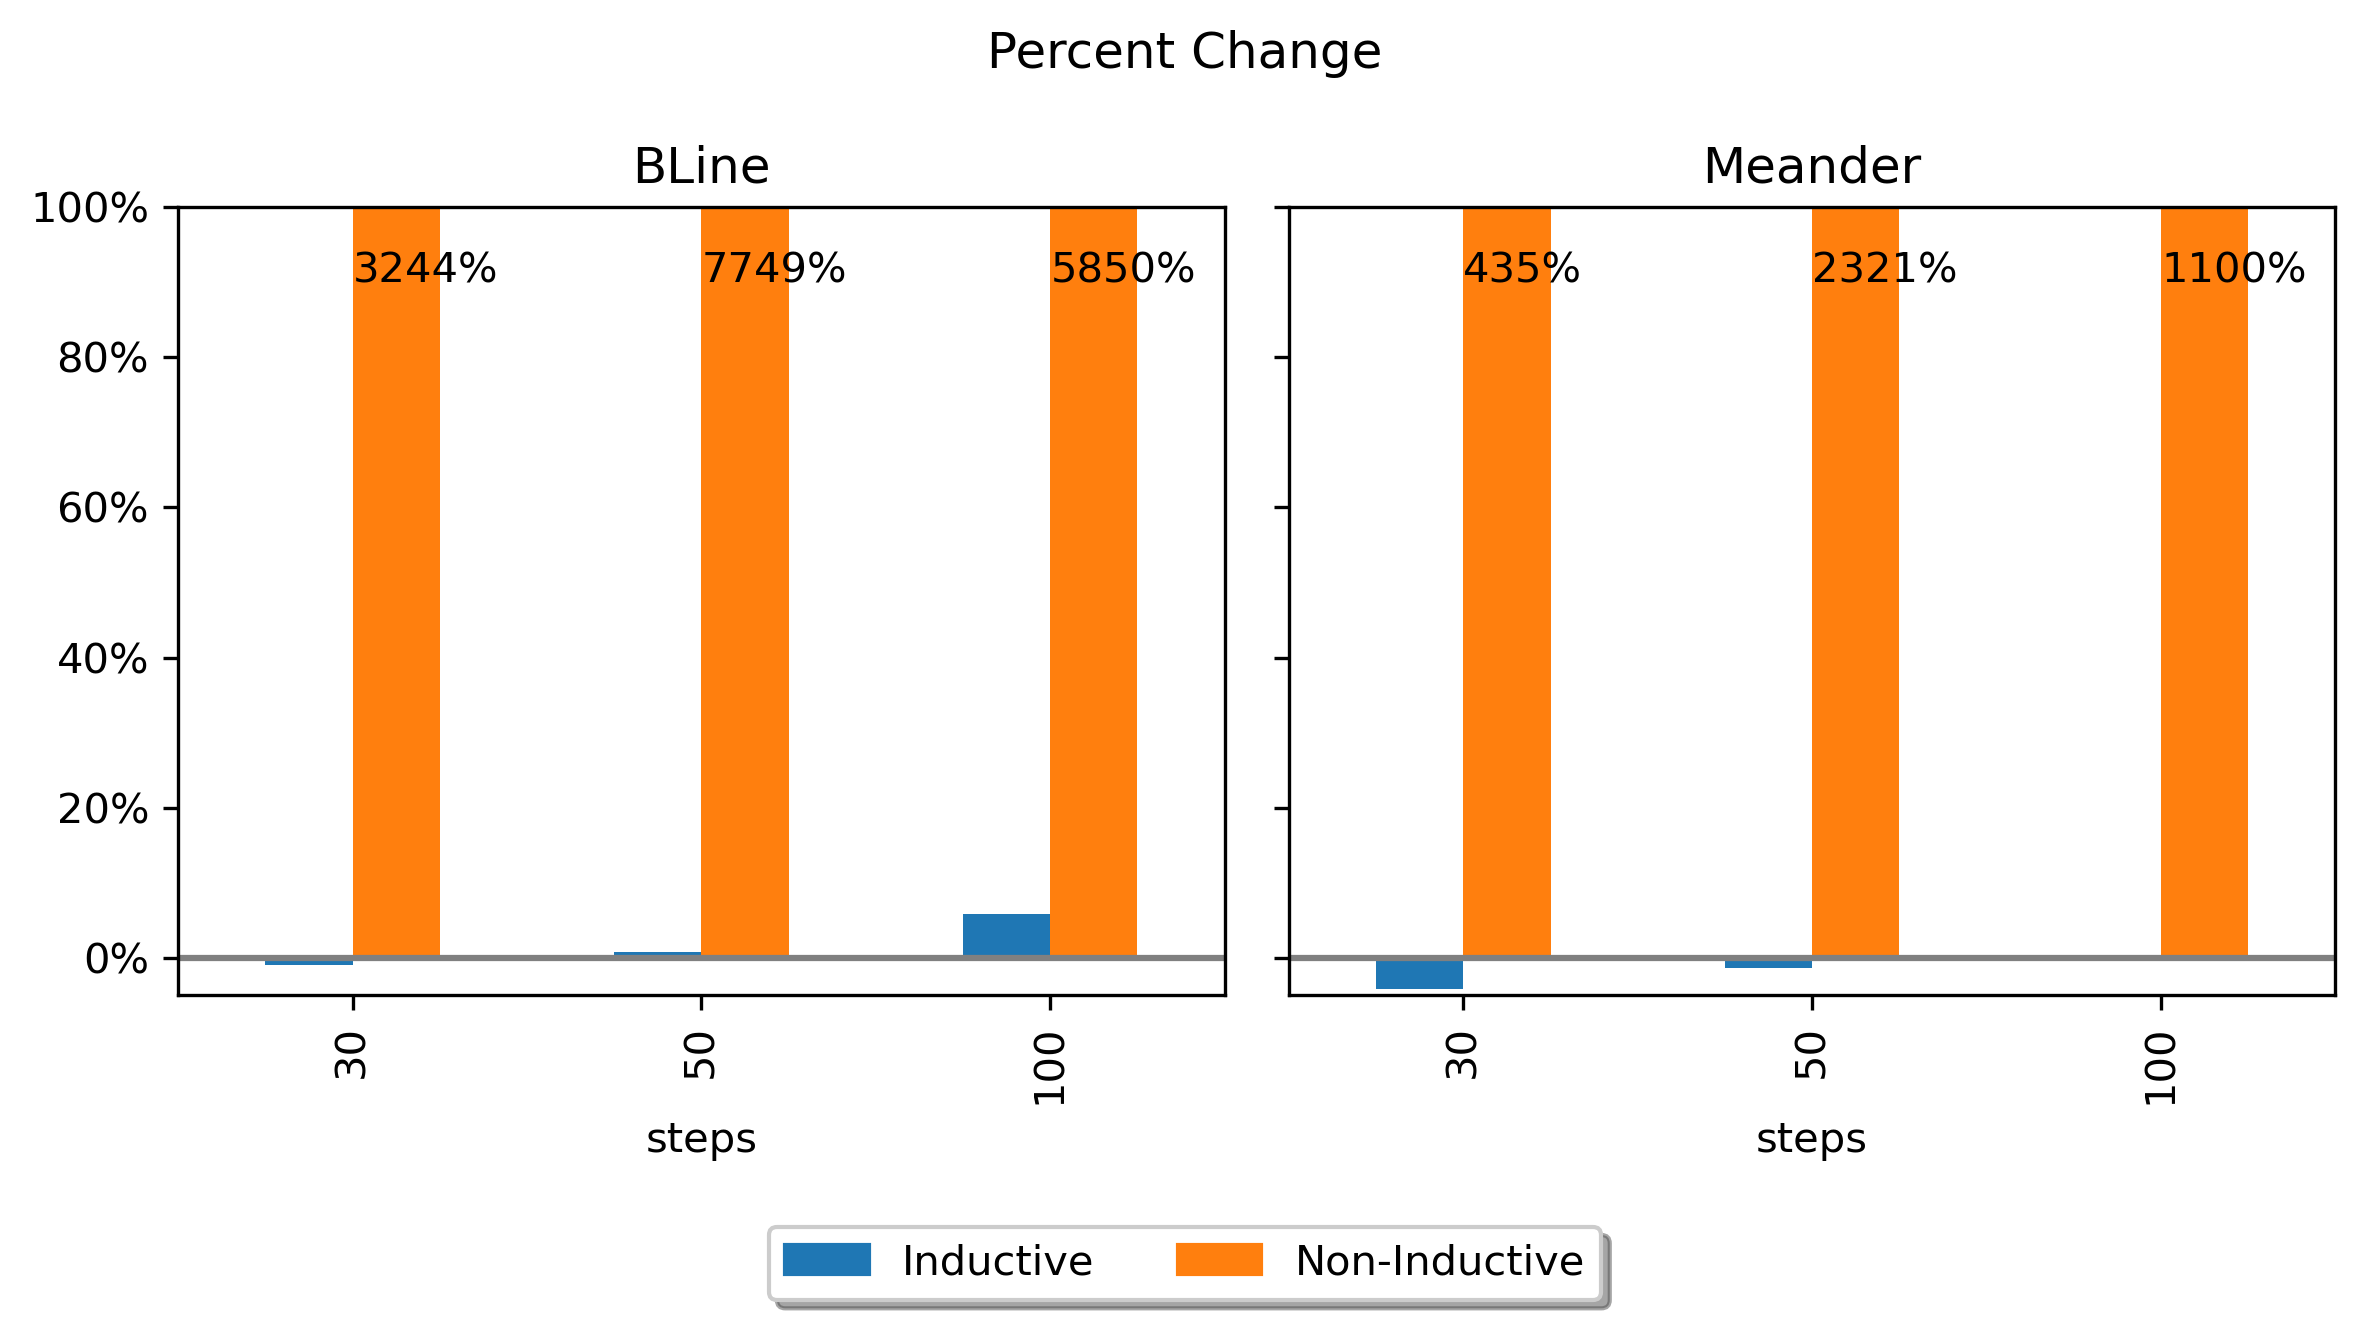

In [36]:
fig,ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(8,4)
fig.set_dpi(300)
plt.title('Percent change')
plt.ylim(-5,100)

ax[0].axhline(0, color='gray')
bline.plot.bar(y=['Inductive (% change)', 'Non-Inductive (% change)'], ax=ax[0], legend=False)
ax[0].text(0.0, 90, '3244%')
ax[0].text(1.0, 90, '7749%')
ax[0].text(2.0, 90, '5850%')
ax[0].set_title('BLine')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())

ax[1].axhline(0, color='gray')
meander.plot.bar(y=['Inductive (% change)', 'Non-Inductive (% change)'], ax=ax[1], legend=False)
ax[1].text(0.0, 90, '435%')
ax[1].text(1.0, 90, '2321%')
ax[1].text(2.0, 90, '1100%')
ax[1].set_title('Meander')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())

handles = [plt.Rectangle((0,0),1,1,color=f'C{i}') for i in range(2)]
fig.legend(handles=handles, labels=['Inductive', 'Non-Inductive'], 
           loc='upper center', bbox_to_anchor=(0.5, 0),
            fancybox=True, shadow=True, ncol=2)

plt.suptitle('Percent Change')
plt.tight_layout()
plt.show()

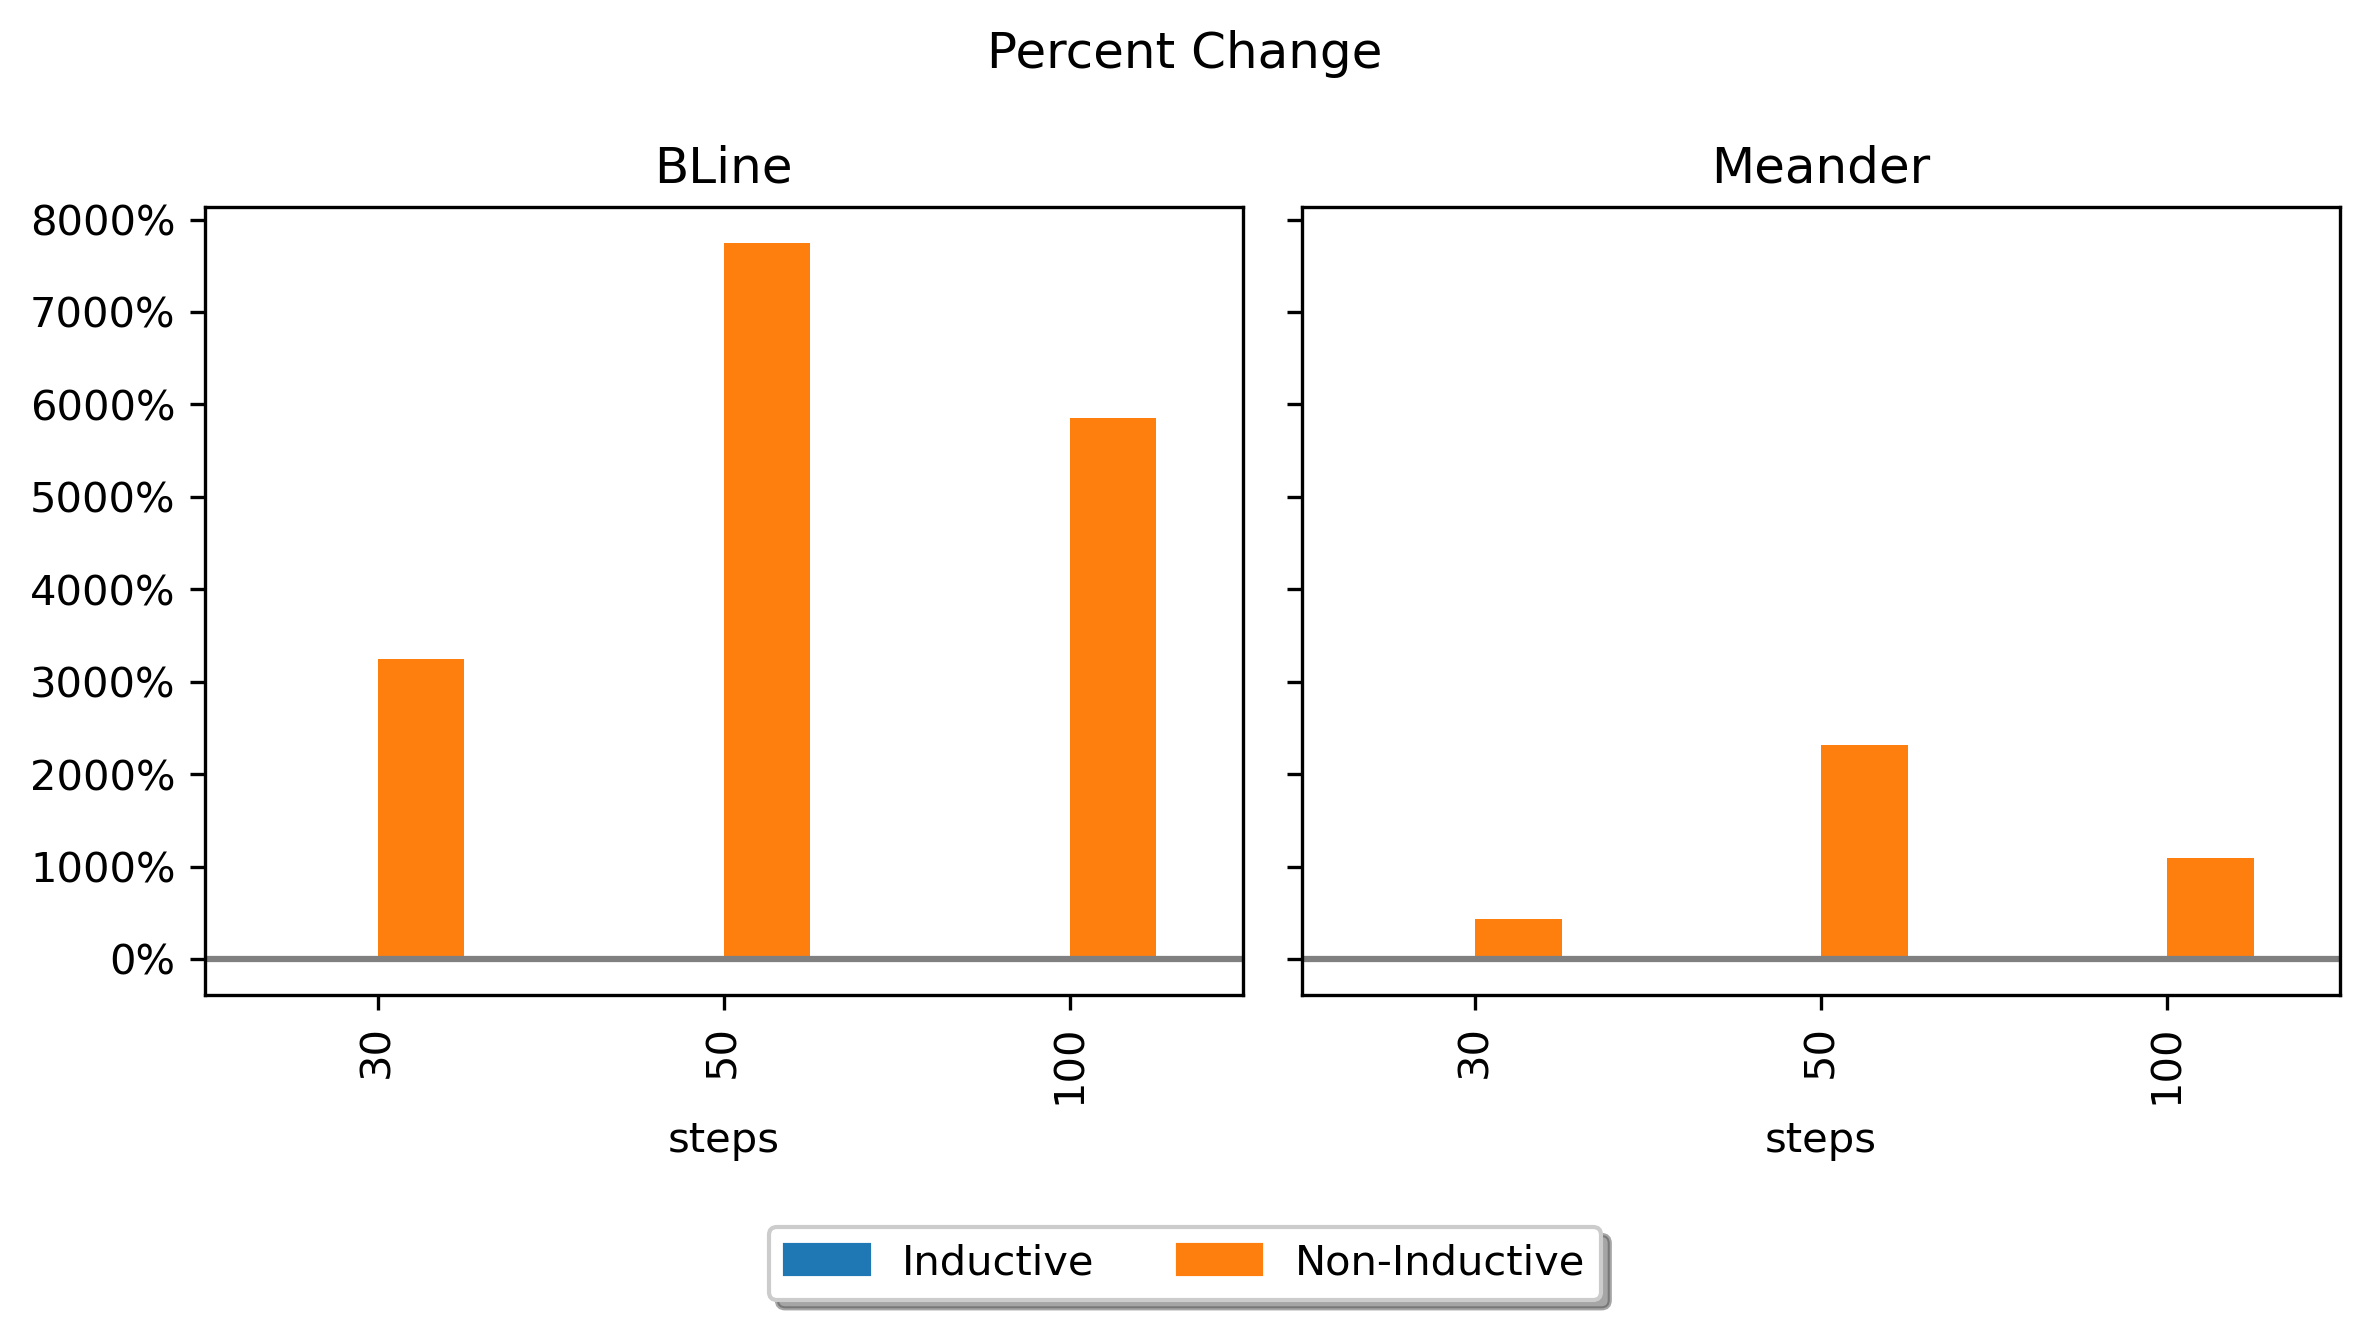

In [38]:
fig,ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(8,4)
fig.set_dpi(300)
plt.title('Percent change')

ax[0].axhline(0, color='gray')
bline.plot.bar(y=['Inductive (% change)', 'Non-Inductive (% change)'], ax=ax[0], legend=False)
ax[0].set_title('BLine')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())

ax[1].axhline(0, color='gray')
meander.plot.bar(y=['Inductive (% change)', 'Non-Inductive (% change)'], ax=ax[1], legend=False)
ax[1].set_title('Meander')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())

handles = [plt.Rectangle((0,0),1,1,color=f'C{i}') for i in range(2)]
fig.legend(handles=handles, labels=['Inductive', 'Non-Inductive'], 
           loc='upper center', bbox_to_anchor=(0.5, 0),
            fancybox=True, shadow=True, ncol=2)

plt.suptitle('Percent Change')
plt.tight_layout()
plt.show()